# PRCP-1025-FlightPricePrediction

Create a predictive model which will help the customers to predict future flight prices and plan their journey accordingly.

## Importing the Libraries

In [262]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Loading The Dataset

In [480]:
df = pd.read_excel('Flight_Fare.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Analysis of Data

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


**Total no. of columns amd rows in the dataset**

In [268]:
df.shape

(10683, 11)

**Summary Statistics**

In [270]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


**Checking for Null values**

In [272]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [273]:
## Dropping Route column
df.drop(['Route'],axis =1,inplace = True)

In [274]:
df.Total_Stops.value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [275]:
## Filling null values with mean().
df['Total_Stops'].fillna('1 stop',inplace=True)

In [276]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Data Preprocessing

In [278]:
## Extracting day and month from Date_of_Journey column using datetime function.
df['jouney_day'] = pd.to_datetime(df.Date_of_Journey).dt.day
df['jouney_month'] = pd.to_datetime(df.Date_of_Journey).dt.month
df.drop('Date_of_Journey',axis =1,inplace = True)

In [279]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,jouney_day,jouney_month
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [280]:
## Seperating hours and minutes from Dep_Time column using datetime function.
df['Dep_hour'] = pd.to_datetime(df.Dep_Time).dt.hour
df['Dep_min'] = pd.to_datetime(df.Dep_Time).dt.minute
df.drop('Dep_Time',axis =1,inplace = True)

In [281]:
df.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,jouney_day,jouney_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [282]:
## Seperating hours and minutes from Arrival_Time column using datetime function.
df['Arrival_hour']= pd.to_datetime(df.Arrival_Time).dt.hour
df['Arrival_min']= pd.to_datetime(df.Arrival_Time).dt.minute
df.drop(['Arrival_Time'],axis =1,inplace= True)

In [283]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,jouney_day,jouney_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [284]:
## Splitting hour and minutes from Duration Column.
df['Duration_hour']=df['Duration'].str.split('h').str[0]
df['Duration_mins']=df['Duration'].str.split('m').str[0]
df.drop(['Duration'],axis =1,inplace= True)

In [285]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,jouney_day,jouney_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,22,20,1,10,2,2h 50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,5,50,13,15,7,7h 25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,9,25,4,25,19,19h
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,18,5,23,30,5,5h 25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,16,50,21,35,4,4h 45


In [286]:
df[df['Duration_hour']=='5m']

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,jouney_day,jouney_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_mins
6474,Air India,Mumbai,Hyderabad,2 stops,No info,17327,6,3,16,50,16,55,5m,5


In [287]:
df.drop(6474,axis=0,inplace=True)

## Exploratory Data Analysis EDA

<Axes: xlabel='Airline', ylabel='count'>

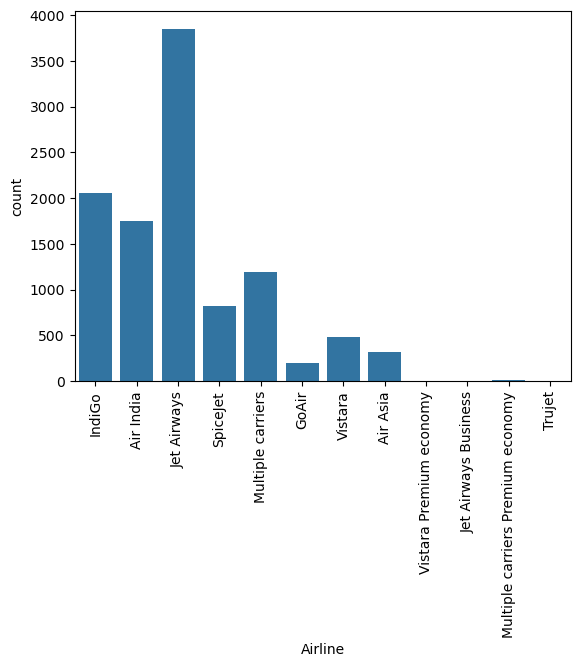

In [289]:
plt.xticks(rotation = 90)
sns.countplot(x='Airline', data = df)

### Insights
- Jet Airways has the highest lead in this dataset whereas Vistara Premium economy, Jet Airways Business, Multiple Carriers Premium Economy and Trujet has the least lead.

<Axes: xlabel='Source', ylabel='count'>

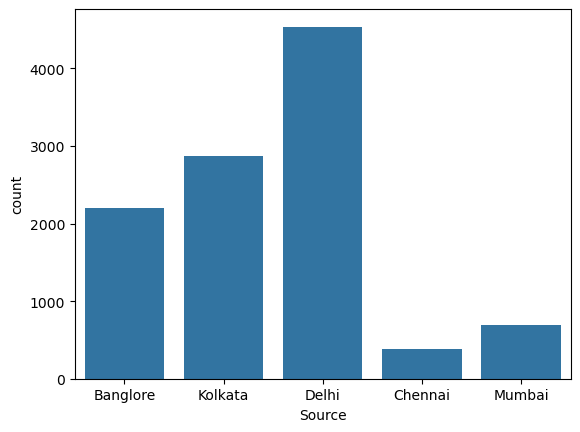

In [291]:
sns.countplot(x = 'Source',data = df)

### Insights
- Most of the passenger's source is through Delhi and least is Chennai.

<Axes: xlabel='Destination', ylabel='count'>

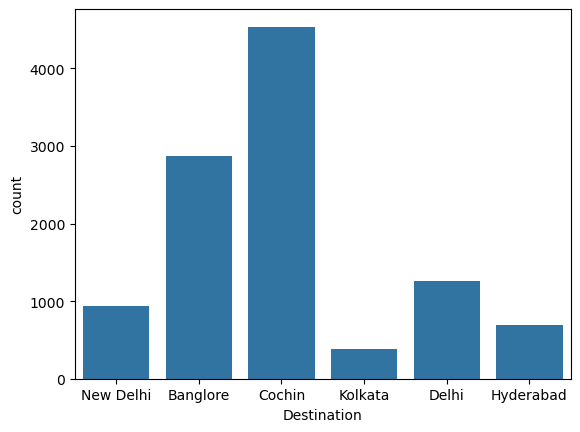

In [293]:
sns.countplot(x = 'Destination',data = df)

### Insights
- We can see that Cochin has the highest place where the passengers wish to travel. Here, New Delhi and Delhi are being treated differently here.

<Axes: xlabel='Total_Stops', ylabel='count'>

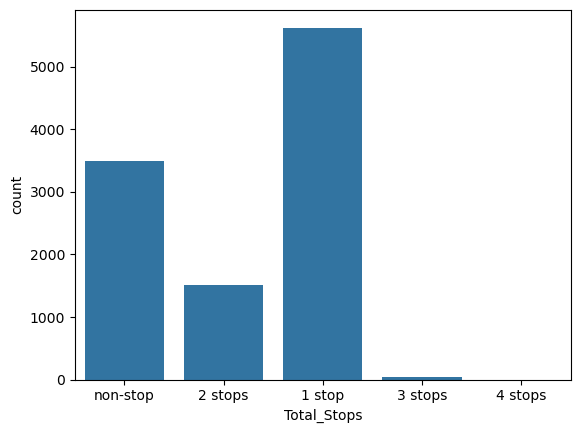

In [295]:
sns.countplot(x = 'Total_Stops',data = df)

### Insights
- We can see that highest is with the 1 stop and least is with 4 stops and very few with 3 stops.

<Axes: xlabel='Additional_Info', ylabel='count'>

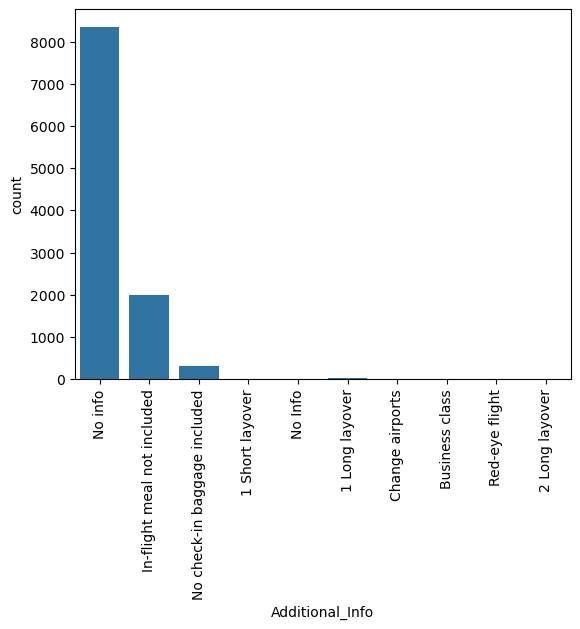

In [297]:
plt.xticks(rotation = 90)
sns.countplot(x = 'Additional_Info', data = df)

### Insights
- In this column, passengers haven't sepcified with the information column as we have with the highest value with NO info.

<Axes: xlabel='Price', ylabel='Count'>

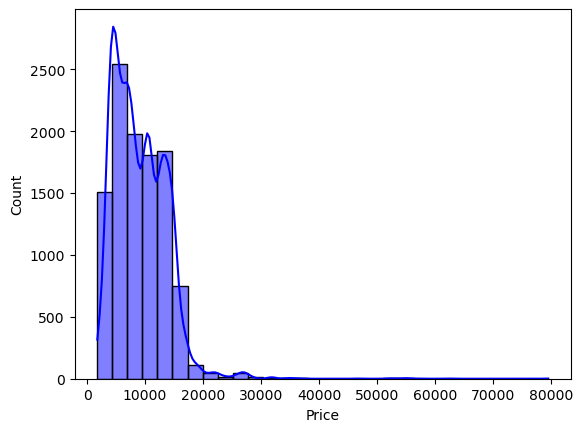

In [299]:
sns.histplot(df['Price'], kde=True, bins=30, color='blue')

### Insights
- In this column, the highest price range 1000 to 10000.

<Axes: xlabel='jouney_day', ylabel='count'>

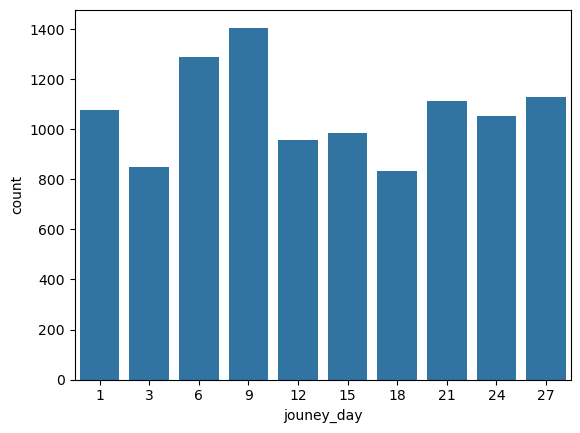

In [300]:
sns.countplot(x = 'jouney_day', data = df)

### Insights
- Passengers mostly travel on 9th of every month.

<Axes: xlabel='jouney_month', ylabel='count'>

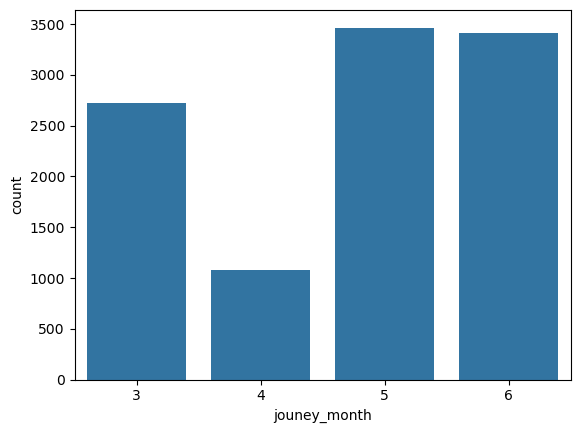

In [302]:
sns.countplot(x = 'jouney_month', data = df)

### Insights
- There are a lot more flights being taken in the summer (May and June)

<Axes: xlabel='Dep_hour', ylabel='count'>

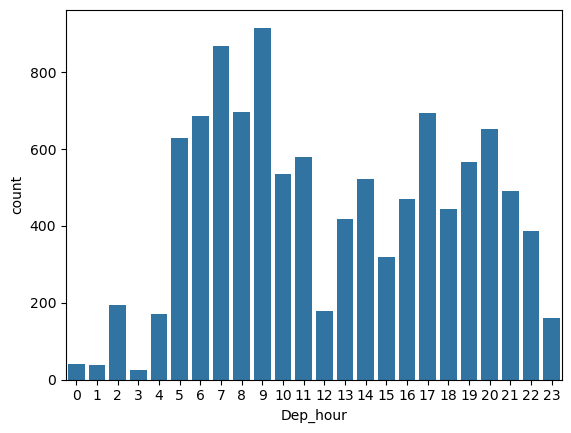

In [304]:
sns.countplot(x = 'Dep_hour', data = df)

<Axes: xlabel='Dep_min', ylabel='count'>

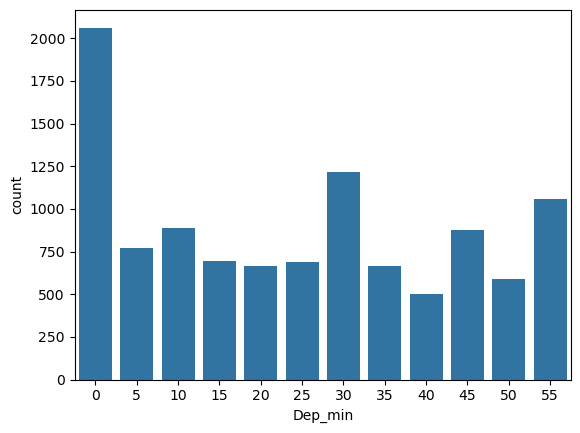

In [305]:
sns.countplot(x = 'Dep_min', data = df)

<Axes: xlabel='Arrival_hour', ylabel='count'>

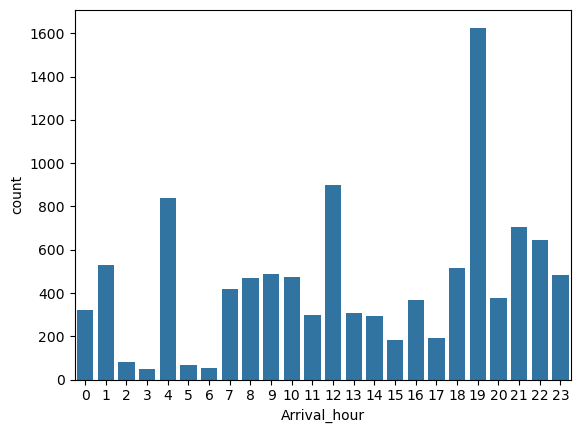

In [306]:
sns.countplot(x = 'Arrival_hour', data = df)

<Axes: xlabel='Arrival_min', ylabel='count'>

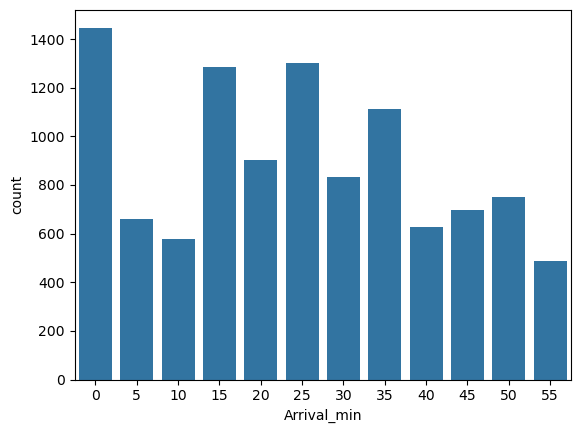

In [307]:
sns.countplot(x = 'Arrival_min', data = df)

<Axes: xlabel='Duration_hour', ylabel='count'>

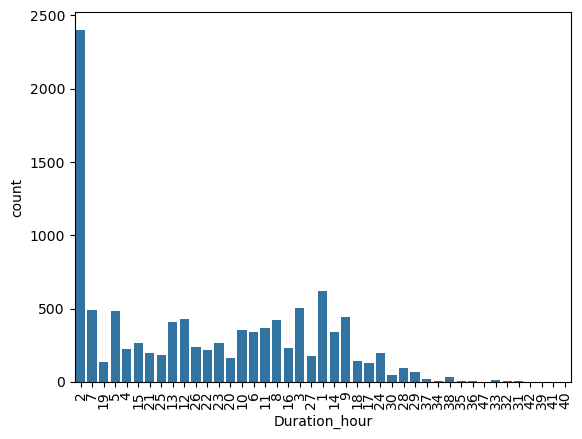

In [308]:
plt.xticks(rotation = 90)
sns.countplot(x = 'Duration_hour', data = df)

## Categorical Column and Price

<Axes: xlabel='Airline', ylabel='Price'>

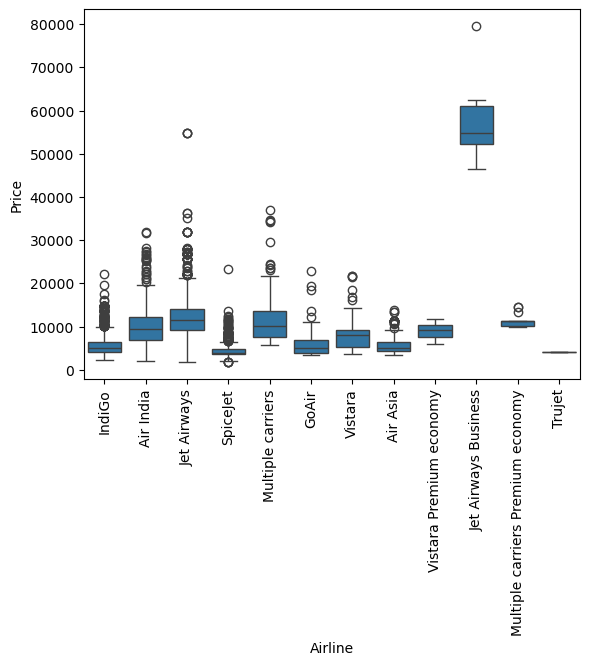

In [310]:
plt.xticks(rotation = 90)
sns.boxplot(data=df, x='Airline', y='Price')

### Insights
There are quite a few price outliers for Indigo, AirIndia, Jet Airways, SpiceJet.

<Axes: xlabel='Source', ylabel='Price'>

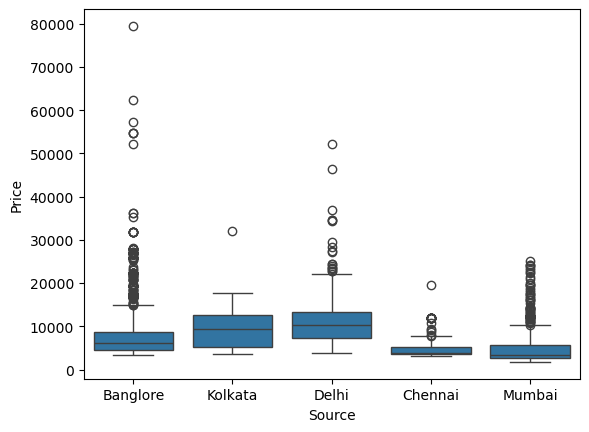

In [312]:
sns.boxplot(data=df, x='Source', y='Price')

### Insights
There are quite a few price outliers for Banglore, Mumbai and Delhi.

<Axes: xlabel='Destination', ylabel='Price'>

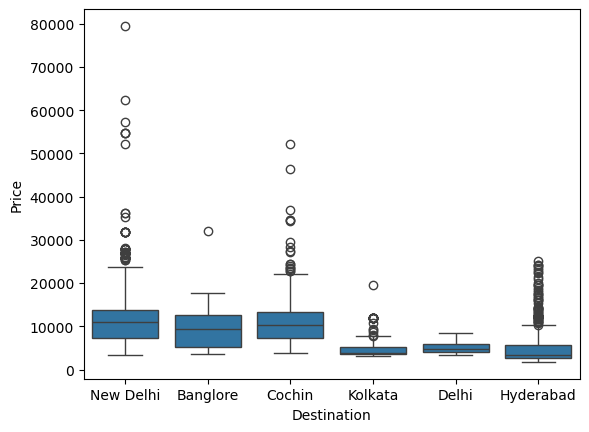

In [314]:
sns.boxplot(data=df, x='Destination', y='Price')

### Insight
We can see that the outliers are quite high for Cochin because of the number of flights headed across multiple locations. For New Delhi and Hyderabad, it could be because of their metropolitan status.

<Axes: xlabel='Total_Stops', ylabel='Price'>

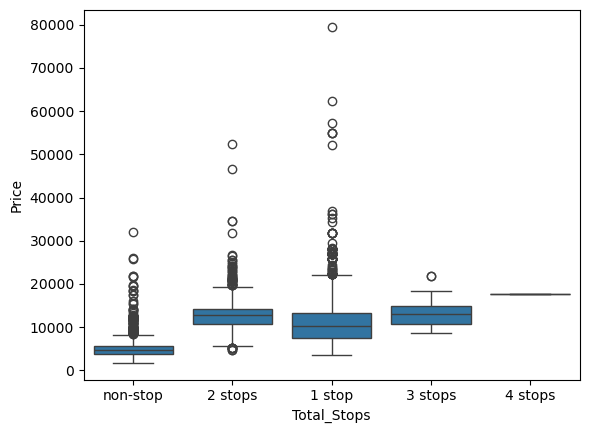

In [316]:
sns.boxplot(data=df, x='Total_Stops', y='Price')

<Axes: xlabel='Additional_Info', ylabel='Price'>

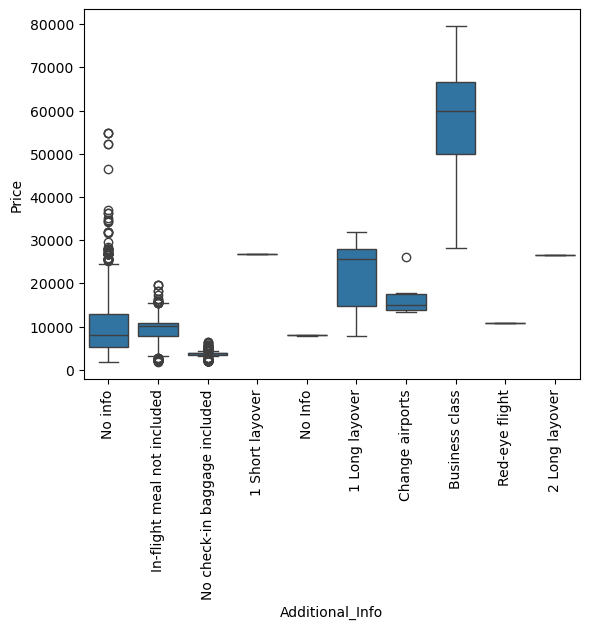

In [317]:
plt.xticks(rotation = 90)
sns.boxplot(data=df, x='Additional_Info', y='Price')

## Converting Categorical Data to Numberical Data

In [320]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for column in df.columns:
    df[column] = LE.fit_transform(df[column])

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10682 non-null  int32
 1   Source           10682 non-null  int32
 2   Destination      10682 non-null  int32
 3   Total_Stops      10682 non-null  int32
 4   Additional_Info  10682 non-null  int32
 5   Price            10682 non-null  int64
 6   jouney_day       10682 non-null  int64
 7   jouney_month     10682 non-null  int64
 8   Dep_hour         10682 non-null  int64
 9   Dep_min          10682 non-null  int64
 10  Arrival_hour     10682 non-null  int64
 11  Arrival_min      10682 non-null  int64
 12  Duration_hour    10682 non-null  int32
 13  Duration_mins    10682 non-null  int32
dtypes: int32(7), int64(7)
memory usage: 959.7 KB


In [322]:
df.shape

(10682, 14)

**Correlation Matrix**

<Axes: >

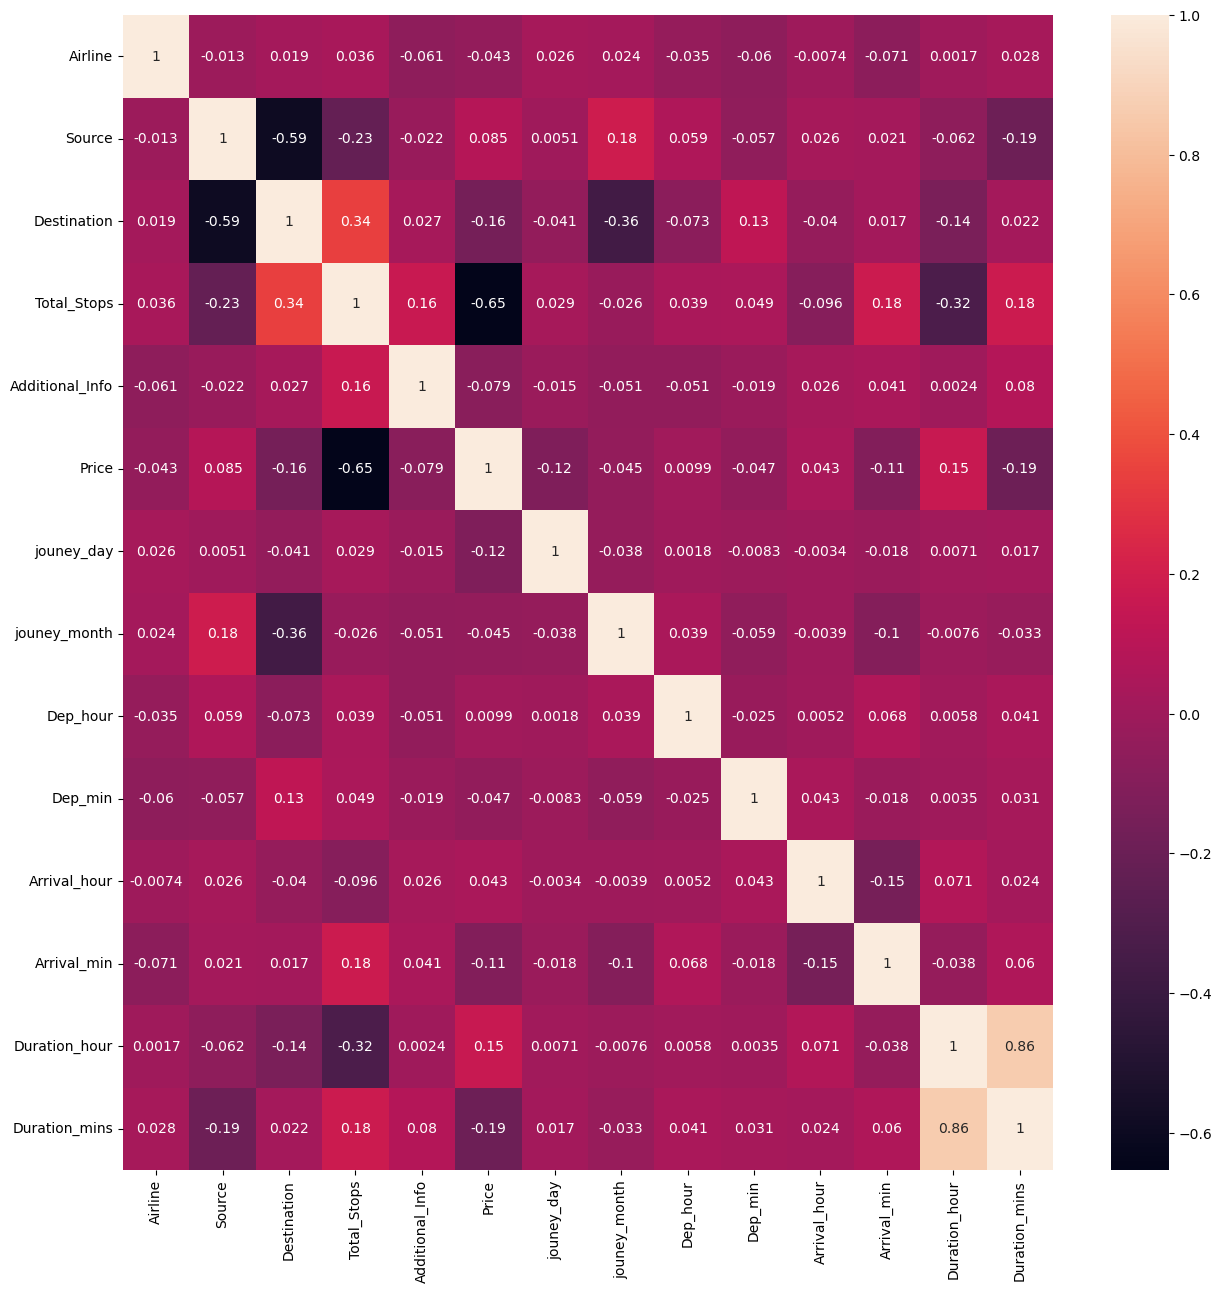

In [324]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot = True)

## Modeling

In [326]:
final_res = []

In [327]:
X = df.drop('Price',axis =1)
y = df.Price

In [328]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(8545, 13) (2137, 13) (8545,) (2137,)


In [329]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(x_train)
#X_test = sc.transform(x_test)

**Linear Regression**

In [331]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [332]:
y_pred_LR = LR.predict(X_test)

In [333]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [334]:
print('Linear Regression :')
print('R2 Score: ',r2_score(y_test,y_pred_LR))
print('Mean Absolute Error', mean_absolute_error(y_test,y_pred_LR))
print('Mean Squared Error', mean_squared_error(y_test,y_pred_LR))
r2_score_LR = r2_score(y_test,y_pred_LR)
final_res.append(r2_score_LR)

Linear Regression :
R2 Score:  0.4695156932312473
Mean Absolute Error 332.3885399143367
Mean Squared Error 170842.81349482044


**Random Forest**

In [336]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(X_train,y_train)

RandomForestRegressor()

In [337]:
y_pred_RF = RF.predict(X_test)

In [338]:
print('Random Forest :')
print('R2 Score: ',r2_score(y_test,y_pred_RF))
print('Mean Absolute Error', mean_absolute_error(y_test,y_pred_RF))
print('Mean Squared Error', mean_squared_error(y_test,y_pred_RF))
r2_score_RF = r2_score(y_test,y_pred_RF)
final_res.append(r2_score_RF)

Random Forest :
R2 Score:  0.9367488463053142
Mean Absolute Error 76.701156161184
Mean Squared Error 20370.07488461662


**Decision Tree**

In [340]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(X_train,y_train)

DecisionTreeRegressor()

In [341]:
y_pred_DT = DT.predict(X_test)

In [342]:
print('Decision Tree :')
print('R2 Score: ',r2_score(y_test,y_pred_DT))
print('Mean Absolute Error', mean_absolute_error(y_test,y_pred_DT))
print('Mean Squared Error', mean_squared_error(y_test,y_pred_DT))
r2_score_DT = r2_score(y_test,y_pred_DT)
final_res.append(r2_score_DT)

Decision Tree :
R2 Score:  0.8871844809683103
Mean Absolute Error 85.2831071595695
Mean Squared Error 36332.31074195393


**K-Nearest Neighbors**

In [344]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor()
KNN.fit(X_train,y_train)

KNeighborsRegressor()

In [345]:
y_pred_KNN = KNN.predict(X_test)

In [346]:
print("K-Nearest Neighbors :")
print ("R2 Score : ",r2_score(y_test,y_pred_KNN))
print ("Mean Absolute Error :",mean_absolute_error(y_test,y_pred_KNN))
print ("Mean Squared Error :",mean_squared_error(y_test,y_pred_KNN))
r2_score_KNN = r2_score(y_test,y_pred_KNN)
final_res.append(r2_score_KNN)

K-Nearest Neighbors :
R2 Score :  0.7580419294119934
Mean Absolute Error : 183.27215722976135
Mean Squared Error : 77922.75284978944


**GradientBoosting**

In [348]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()
GB.fit(X_train,y_train)

GradientBoostingRegressor()

In [349]:
y_pred_GB = GB.predict(X_test)

In [350]:
print("GradientBoosting : ")
print ("R2 Score : ",r2_score(y_test,y_pred_GB))
print ("Mean Absolute Error :",mean_absolute_error(y_test,y_pred_GB))
print ("Mean Squared Error :",mean_squared_error(y_test,y_pred_GB))
r2_score_GB = r2_score(y_test,y_pred_GB)
final_res.append(r2_score_GB)

GradientBoosting : 
R2 Score :  0.8543038493523812
Mean Absolute Error : 156.4274184241644
Mean Squared Error : 46921.539382794355


**XGBoost**

In [352]:
from xgboost import XGBRegressor
XGB = XGBRegressor()
XGB.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [353]:
y_pred_XGB = XGB.predict(X_test)

In [354]:
print("XGBoost : ")
print ("R2 Score : ",r2_score(y_test,y_pred_XGB))
print ("Mean Absolute Error :",mean_absolute_error(y_test,y_pred_XGB))
print ("Mean Squared Error :",mean_squared_error(y_test,y_pred_XGB))
r2_score_XGB = r2_score(y_test,y_pred_XGB)
final_res.append(r2_score_XGB)

XGBoost : 
R2 Score :  0.9394573271670041
Mean Absolute Error : 89.93855787081156
Mean Squared Error : 19497.80687441571


**AdaBoosting**

In [356]:
from sklearn.ensemble import AdaBoostRegressor
ADA = AdaBoostRegressor()
ADA.fit(X_train,y_train)

AdaBoostRegressor()

In [357]:
y_pred_ADA = ADA.predict(X_test)

In [358]:
print("AdaBoostRegressor : ")
print ("R2 Score : ",r2_score(y_test,y_pred_ADA))
print ("Mean Absolute Error :",mean_absolute_error(y_test,y_pred_ADA))
print ("Mean Squared Error :",mean_squared_error(y_test,y_pred_ADA))
r2_score_ADA = r2_score(y_test,y_pred_ADA)
final_res.append(r2_score_ADA)

AdaBoostRegressor : 
R2 Score :  0.6656497057539548
Mean Absolute Error : 275.10120105525885
Mean Squared Error : 107677.72813063745


**Comparing the Models**

In [360]:
final=np.array(final_res)
result=final.reshape(-1,1)
columns=['R2 Score']
index=['Linear Regression', 'Random Forest','Decision Tree','K-Nearest Neighbors','GradientBoosting','XGBoost','AdaBoosting']
final_result=pd.DataFrame(result,index=index,columns=columns)
final_result.sort_values(by='R2 Score', ascending=False)

,R2 Score
XGBoost,0.939457
Random Forest,0.936749
Decision Tree,0.887184
GradientBoosting,0.854304
K-Nearest Neighbors,0.758042
AdaBoosting,0.665650
Linear Regression,0.469516


## Hyperparameter optimization

#### Selecting highest 3 models for hypertuning.

In [362]:
from sklearn.model_selection import RandomizedSearchCV

**Random Florest**

In [364]:
params_rf = {
    "n_estimators": np.arange(10,500),
    "max_depth": np.arange(10,100),
    "min_samples_split": np.arange(2,5),
    "min_samples_leaf": np.arange(1,5)
}

In [365]:
model_rf = RandomizedSearchCV(
    RandomForestRegressor(),
    param_distributions=params_rf,
    random_state=42,
    #scoring='neg_mean_absolute_error',
    n_iter=100,
    cv=5,
    n_jobs=-1
)

In [366]:
model_rf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86,...
       413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425,
       426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438,
       439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451,
       452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464,
       465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477,
       478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490,
       491, 492, 493, 494, 495, 496, 497, 498, 499])},
                   random_state=42)

In [367]:
y_predict_model_rf = model_rf.predict(X_test)

In [368]:
print('Random Forest Regressor :')
print('R2 Score: ',r2_score(y_test,y_predict_model_rf))
print('Mean Absolute Error', mean_absolute_error(y_test,y_predict_model_rf))
print('Mean Squared Error', mean_squared_error(y_test,y_predict_model_rf))
r2_score_model_rf = r2_score(y_test,y_predict_model_rf)
mae_model_rf = mean_absolute_error(y_test,y_predict_model_rf)

Random Forest Regressor :
R2 Score:  0.9382532203447052
Mean Absolute Error 79.61672038936935
Mean Squared Error 19885.590253952214


**Decision Tree**

In [370]:
params_dt = {
    "max_depth": np.arange(10,200)
}

In [371]:
model_dt = RandomizedSearchCV(
    DecisionTreeRegressor(),
    param_distributions=params_dt,
    random_state=42,
    n_iter=200,
    cv=5,
    n_jobs=-1
)

In [372]:
model_dt.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'max_depth': array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
        23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,...
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       192, 193, 194, 195, 196, 197, 198, 199])},
                   random_state=42)

In [373]:
y_predict_model_dt = model_dt.predict(X_test)

In [374]:
print('Decision Tree Regressor :')
print('R2 Score: ',r2_score(y_test,y_predict_model_dt))
print('Mean Absolute Error', mean_absolute_error(y_test,y_predict_model_dt))
print('Mean Squared Error', mean_squared_error(y_test,y_predict_model_dt))
r2_score_model_dt = r2_score(y_test,y_predict_model_dt)
mae_model_dt = mean_absolute_error(y_test,y_predict_model_dt)

Decision Tree Regressor :
R2 Score:  0.8820468585304659
Mean Absolute Error 106.69430476455318
Mean Squared Error 37986.885365097405


**XGBoost**

In [376]:
params_xgb = {
    #"booster": ['gbtree'], 
    "max_depth": np.arange(2, 20), # default 3
    "n_estimators": np.arange(10, 500), # default 100
    "min_child_weight": np.arange(1,5)
}

In [377]:
model_xgb = RandomizedSearchCV(
    XGBRegressor(),
    param_distributions=params_xgb,
    random_state=42,
    n_iter=200,
    cv=5,
    n_jobs=-1
)

In [378]:
model_xgb.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
       413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425,
       426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438,
       439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451,
       452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464,
       465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477,
       478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490,
       491, 492, 493, 494, 495, 496, 497, 498, 499])},
                   random_state=42)

In [379]:
y_predict_model_xgb = model_xgb.predict(X_test)

In [380]:
print('R2 Score: ',r2_score(y_test,y_predict_model_xgb))
print('Mean Absolute Error', mean_absolute_error(y_test,y_predict_model_xgb))
print('Mean Squared Error', mean_squared_error(y_test,y_predict_model_xgb))
r2_score_model_xgb = r2_score(y_test,y_predict_model_xgb)
mae_model_xgb = mean_absolute_error(y_test,y_predict_model_xgb)

R2 Score:  0.9396114618665339
Mean Absolute Error 87.06898666228263
Mean Squared Error 19448.167694917218


## Selecting the best model

In [382]:
models_score = pd.DataFrame({'R2 Score':[r2_score_model_rf,r2_score_model_dt,r2_score_model_xgb],'Mean Absolute Error':[mse_model_rf,mse_model_dt,mse_model_xgb]}, index=['Random forest', 'Decision tree', 'XGBoost'])
models_score

,R2 Score,Mean Absolute Error
Random forest,0.938253,77.306537
Decision tree,0.882047,108.411816
XGBoost,0.939611,87.035206


**Conclusion**

-At the end I decided to select the Random Forest Model as it gives the least value of Mean Absolute Error as lower value of Mean Absolute Error is better and Higher R2 Score is better.